In [ ]:
import re

import nltk
import warnings
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer


warnings.filterwarnings("ignore")

In [ ]:
%%capture
!pip install goslate;
!pip install langdetect;

In [ ]:
%%capture
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [ ]:
data = pd.read_csv("Tweets_data.csv")

In [ ]:
df = data.copy()

In [ ]:
#df.head()

In [ ]:
lower = []
for r in df.full_text:
  lower.append(r.lower())

In [ ]:
df.full_text = lower

In [ ]:
ori = pd.read_csv('dropped.csv')

In [ ]:
ori.shape

In [ ]:
df['Original_Tweets'] = ori['full_text']

In [ ]:
new_df = df.copy()
new_df.drop_duplicates(subset="full_text",keep="first")

In [ ]:
df.to_csv("ori_data.csv")

In [ ]:
df.shape

(34999, 7)

In [ ]:
test = ""
for r in df.full_text:
  test += str(r)

In [ ]:
tweets = pd.DataFrame()
tweets['tweets'] = test

In [ ]:
tweets.to_csv('tweets.csv')

# New section

In [ ]:
tokenize = word_tokenize(test,'english')

In [ ]:
final_words = []
for word in tokenize:
  if word not in stopwords:
    final_words.append(word)

In [ ]:
vec = TfidfVectorizer(min_df=30)
trans = vec.fit_transform(lower)

In [ ]:
a = vec.get_feature_names()
a = [a_ for a_ in a if a_ not in stopwords]

In [ ]:
a

['aari',
 'ab',
 'abandons',
 'abc',
 'abdul',
 'able',
 'absolutely',
 'abuse',
 'abysmal',
 'accel',
 'accelerating',
 'accept',
 'access',
 'accident',
 'according',
 'account',
 'accounts',
 'across',
 'act',
 'acting',
 'action',
 'active',
 'activists',
 'actors',
 'actorvijay',
 'actual',
 'actually',
 'add',
 'addiction',
 'addo',
 'address',
 'adgpi',
 'adhd',
 'administration',
 'administrator',
 'admitted',
 'adopted',
 'adopts',
 'advance',
 'advice',
 'affect',
 'affected',
 'afford',
 'afp',
 'afraid',
 'africa',
 'african',
 'agar',
 'age',
 'agency',
 'agenda',
 'agent',
 'ago',
 'agree',
 'ahead',
 'ahgqzgsz',
 'ai',
 'aid',
 'aids',
 'air',
 'ajenglish',
 'akbar',
 'akshaysharmaorg',
 'aktu',
 'al',
 'alcohol',
 'alert',
 'alive',
 'allah',
 'allow',
 'allowed',
 'allowing',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'amar',
 'amazing',
 'america',
 'american',
 'americans',
 'amid',
 'amidst',
 'amitshah',
 'among',
 'amount',
 'amp'

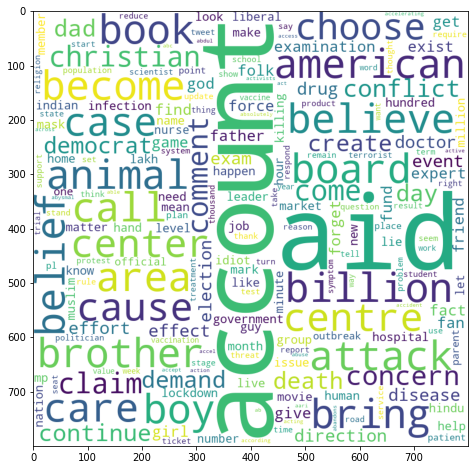

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(" ".join(a))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

In [ ]:
def analyzer(words):
  scores = SentimentIntensityAnalyzer().polarity_scores(words)
  pos = scores['pos']
  neg = scores['neg']
  
  if(pos>neg):
    return "Positive"
  elif(pos<neg):
    return "Negative"
  else:
    return "Neutral"

In [ ]:
sentiment = []
for r in lower:
  sentiment.append(analyzer(r))

In [ ]:
sentiment_df = df.copy()
sentiment_df['sentiment'] = np.array(sentiment)
sentiment_df['original'] = ori['full_text']

In [ ]:
sentiment_df.to_csv("sentiments.csv")

# Filtering Locations

In [ ]:
locations = pd.read_csv("location.csv")

In [ ]:
locations = locations.drop("Unnamed: 0", axis=1)

In [ ]:
loc_ = locations.Location.to_list()

In [ ]:
# loc_

In [ ]:
# for r in loc_:
#   r = r.split(",")

In [ ]:
#loc_[0:100]

In [ ]:
import goslate

In [ ]:
gs = goslate.Goslate()

In [ ]:
print(gs.translate("carpe diem",'en'))

carpe diem


In [ ]:
def detect_language(place):
  from langdetect import detect
  return detect(place)

In [ ]:
def convert_to_en(place,lang):
  import goslate
  gs = goslate.Goslate()
  conv = gs.translate(place,lang,'en')
  return conv

In [ ]:
places = []
for r_ in loc_:
  place = re.split("[,|]",r_)
  if(place[0] == r_):
    #lang = detect_language(r_)
    # if(lang!='en'):
    #   r_ = convert_to_en(r_,lang)

    places.append(r_)
    continue
  
  for place_ in place:
    # if(lang!='en'):
      
    #   place_ = convert_to_en(place_,lang)
      
    places.append(place_)  

In [ ]:
for place in places:
  if(place==''):
    places.remove(place)
  place = place.lower()

In [ ]:
raw_place = places
places = list(set(places))

In [ ]:
for i in range(len(places)):
  places[i] = places[i].lower()

In [ ]:
cities = pd.read_excel("worldcities.xlsx")

In [ ]:
countries = cities.country.to_list()

In [ ]:
for i in range(len(countries)):
  countries[i] = countries[i].lower()

countries = list(set(countries))

In [ ]:
raw_tweet_countries = []
for i in raw_place:
  if i.lower() in countries:
    raw_tweet_countries.append(i.title())

In [ ]:
tweet_countries = []
for i in places:
  if i.lower() in countries:
    tweet_countries.append(i.title())

In [ ]:
world_cities = cities.city_ascii.to_list()
for i in range(len(world_cities)):
  world_cities[i] = world_cities[i].lower()
world_cities = list(set(world_cities))

In [ ]:
raw_tweet_cities = []
for i in raw_place:
  if i.lower() in world_cities:
    raw_tweet_cities.append(i.title())

In [ ]:
tweet_cities = []
for i in places:
  if i.lower() in world_cities:
    tweet_cities.append(i.title())

In [ ]:
print(len(tweet_cities),len(raw_tweet_cities))

1454 8326


In [ ]:
print(len(tweet_countries),len(raw_tweet_countries))

149 2386


In [ ]:
tweet_countries_ = pd.DataFrame()
tweet_cities_ = pd.DataFrame()
raw_tweet_countries_ = pd.DataFrame()
raw_tweet_cities_ = pd.DataFrame()

In [ ]:
tweet_countries_['Countries'] = tweet_countries
tweet_cities_['Cities'] = tweet_cities

In [ ]:
tweet_countries_.to_csv("tweet_countries.csv")
tweet_cities_.to_csv("tweet_cities.csv")

In [ ]:
raw_tweet_countries_['Countries'] = raw_tweet_countries
raw_tweet_cities_['Cities'] = raw_tweet_cities

countries_col = raw_tweet_countries_['Countries'].value_counts().index.to_list()
countries_col_val = raw_tweet_countries_['Countries'].value_counts().to_list()

cities_col = raw_tweet_cities_['Cities'].value_counts().index.to_list()
cities_col_val = raw_tweet_cities_['Cities'].value_counts().to_list()

In [ ]:
raw_tweet_countries_ = raw_tweet_countries_.drop('Countries',axis=1)
raw_tweet_cities_ = raw_tweet_cities_.drop("Cities",axis=1)

In [ ]:
raw_tweet_countries_ = pd.DataFrame()
raw_tweet_cities_ = pd.DataFrame()

raw_tweet_countries_['Countries'] = countries_col
raw_tweet_countries_['Tweets_Contribution(%)'] = (np.array(countries_col_val)/sum(np.array(countries_col_val)))*100


raw_tweet_cities_['Cities'] = cities_col
raw_tweet_cities_['Tweets_Contribution(%)'] = (np.array(cities_col_val)/sum(np.array(countries_col_val)))*100

In [ ]:
raw_tweet_countries_.shape, raw_tweet_cities_.shape

((118, 2), (1325, 2))

In [ ]:
raw_tweet_countries_.to_csv("raw_tweet_countries.csv")
raw_tweet_cities_.to_csv("raw_tweet_cities.csv")